In [1]:
# import all necessary libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A simple function to display the image using matplotlib
def show(img, cmap = None, figsize = (7, 7)):
    plt.figure(figsize = figsize)
    if cmap is not None:
        plt.imshow(img, cmap = cmap), plt.axis('off')
    else:
        plt.imshow(img), plt.axis('off')

# About Histograms

- histogram is a graph or plot, which shows the intensity distribution of an image. It is a plot with pixel values [0, 255] in X-axis and corresponding number of pixels in the image on Y-axis.
- By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image.
- To learn more about histogram, refer [link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html#histograms-getting-started)

## Plot Histogram of an image using OpenCV

- `cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])` a built-in cv2 function can be used to find the histogram of an image
  - **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
  - **channels** : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.
  - **mask** : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
  - **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
  - **ranges** : this is our RANGE. Normally, it is [0,256].


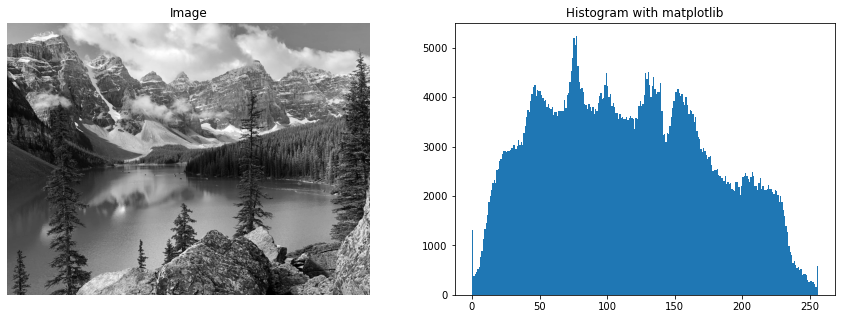

In [21]:
# Load and display gray Image
img_gray = cv2.imread("data/nature.png", 0)

plt.figure(figsize = (15, 5));
plt.subplot(1, 2, 1), plt.imshow(img_gray, cmap = 'gray'), plt.axis('off'), plt.title("Image");
plt.subplot(1, 2, 2), plt.hist(img_gray.ravel(), bins = 256, range = [0,256]), plt.title("Histogram with matplotlib");

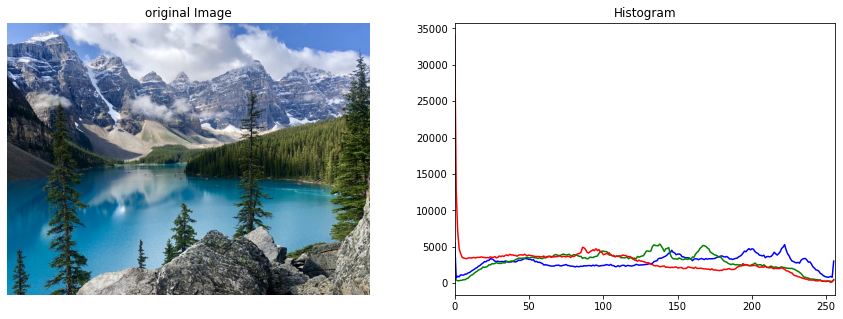

In [56]:
# Load original Image
image = cv2.imread("data/nature.png")

color = ('b','g','r')

# calculate histogram with cv2
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1), plt.imshow(image[:, :, ::-1]), plt.axis('off'), plt.title("original Image")
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.subplot(1, 2, 2), plt.plot(histr,color = col), plt.xlim([0,256]), plt.title("Histogram")



# Histogram Equalization

- Consider an image whose pixel values are confined to some specific range of values only. 
- For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. 
- So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). 
- This normally improves the contrast of the image.
- For detailed information, refer [wikipedia](http://en.wikipedia.org/wiki/Histogram_equalization)

![Histogram_equalization_image](data/histogram_equalization.png)

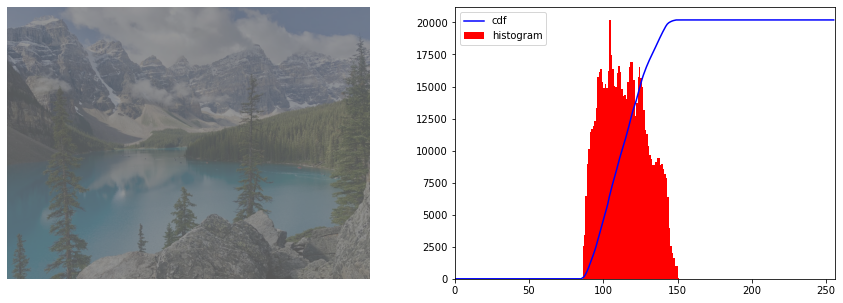

In [81]:
# To explain above theory, will take one example low contrast image
org = cv2.imread("data/low_contrast_nature.png")

img = cv2.imread("data/low_contrast_nature.png", 0)

# display original image in a subplot
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1), plt.imshow(org[:, :, ::-1]), plt.axis('off')

# calculate histogram using numpy
hist,bins = np.histogram(img.flatten(),256,[0,256])

# calculate cummulative density function
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

# plot both histogram and cdf curve in the same subplot
plt.subplot(1, 2, 2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

As can be seen from above histogram, pixel values are confined to some specific range of values only. 

## histogram Equalization using cv2

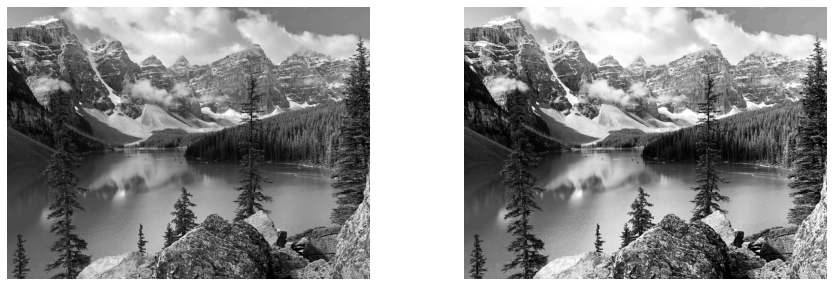

In [86]:
img = cv2.imread("data/low_contrast_nature.png", 0)
equ_img = cv2.equalizeHist(img)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap = "gray"), plt.axis('off');
plt.subplot(1, 2, 2), plt.imshow(equ_img, cmap = "gray"), plt.axis('off');

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

- In this image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). 
- Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). 
- If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization.
- After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.



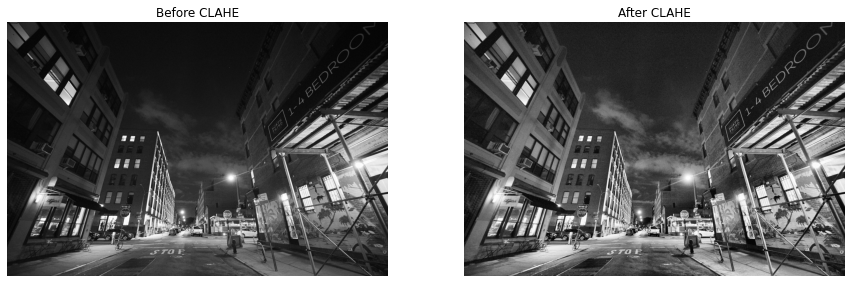

In [85]:
# Load image
img = cv2.imread("data/low_bright.png", 0)


# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap = "gray"), plt.axis('off'), plt.title("Before CLAHE");
plt.subplot(1, 2, 2), plt.imshow(cl1, cmap = "gray"), plt.axis('off'), plt.title("After CLAHE");